# Example 5

ToC:
0. Normal
1. Near match
3. Manual dictionary (table and graph)
4. Automatic dictionary (table and graph)

## 1. Normal

In [1]:
from collatex import *
collation = Collation()
W1 = open( "data/example5/W1.txt", encoding='utf-8' ).read()
W2 = open( "data/example5/W2.txt", encoding='utf-8' ).read()
W3 = open( "data/example5/W3.txt", encoding='utf-8' ).read()
collation.add_plain_witness( "W1", W1 )
collation.add_plain_witness( "W2", W2 )
collation.add_plain_witness( "W3", W3 )
table = collate(collation, output='html2', segmentation=False)
print(table)

None



## 2. Near match

In this method, the parameter 'near_match' of the function 'collate' is switched on, for allowing fuzzy matches in the alignment (or better, in a second round of alignment, which refines the first).

In [2]:
from collatex import *
collation = Collation()
W1 = open( "data/example5/W1.txt", encoding='utf-8' ).read()
W2 = open( "data/example5/W2.txt", encoding='utf-8' ).read()
W3 = open( "data/example5/W3.txt", encoding='utf-8' ).read()
collation.add_plain_witness( "W1", W1 )
collation.add_plain_witness( "W2", W2 )
collation.add_plain_witness( "W3", W3 )
table = collate(collation, output='html2', near_match=True, segmentation=False)
print(table)

None



## 3. Manual dictionary (table and graph)

This method requires the manual creation of a dictionary, with original and normalised forms. The dictionary here includes terms for all the example, so there is no need to change it from one example to the other. It is stored in **dictionaries/manual_dictionary.csv**.

The normalised forms are used for the alignment.

This method produces three outputs:
- a table and a graph, for which see below here; 
- an external table, where formal and substantive variants are separated.

None


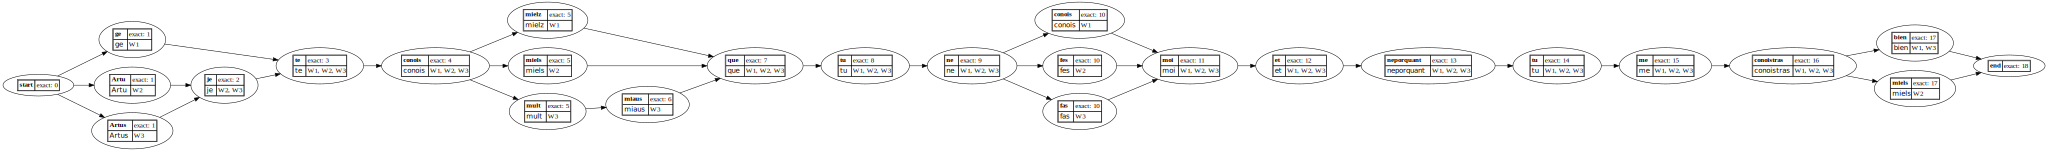

None
external table created!


In [3]:
from collatex import *
collation = Collation()
import csv
import re
from general_functions import table_manualDictionary, tokennormalizer


W1 = open( "data/example5/W1.txt", encoding='utf-8' ).read()
W2 = open( "data/example5/W2.txt", encoding='utf-8' ).read()
W3 = open( "data/example5/W3.txt", encoding='utf-8' ).read()

#create the dictionary consisting of two columns, separated by a comma.
# The first Column 'Original' are the strings as found in the text, 
# the second column 'Normalised' contains the strings you want to replace them with. 
# No whitespaces behind the strings.
Normit = {}
with open('dictionaries/manual_dictionary.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['Original', 'Normalised'])
    for row in reader:
        Normit[row['Original']]= row['Normalised']
#read in the witnesses  from your file system 
from collatex.core_classes import WordPunctuationTokenizer
tokenizer = WordPunctuationTokenizer()

# build a function to tokenize and to normalize by replace keys to be found in 
# the dictionary by the corresponding values 
def tokennormalizer(witness) :
    tokens_as_strings = tokenizer.tokenize(witness)
    list = []
    for token_string in tokens_as_strings:
        normversion = re.sub(r'\s+$',"", token_string)
        replaceversion = Normit.get(normversion,normversion)
        list.append({'t':token_string, 'n':replaceversion})
    return(list)

tokens_W1 = tokennormalizer(W1) 
tokens_W2 = tokennormalizer(W2) 
tokens_W3 = tokennormalizer(W3) 

witness_W1 = { "id": "W1", "tokens":tokens_W1 }
witness_W2 = { "id": "W2", "tokens":tokens_W2 }
witness_W3 = { "id": "W3", "tokens":tokens_W3 }


input = { "witnesses": [ witness_W1, witness_W2, witness_W3 ] }

table = collate(input, output='html2', segmentation=False)
print(table)
graphSvg = collate(input, output='svg', segmentation=False)
print(graphSvg)

graph_manualDictionary = collate(input, output='json', segmentation=False)
table_manualDictionary(graph_manualDictionary, 'example5')
print('external table created!')

## 4. Automatic dictionary (table and graph)

This method creates a dictionary, using the [TreeTagger](http://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/) parameters for old French:
- the [Nouveau corpus d’Amsterdam](http://www.uni-stuttgart.de/lingrom/stein/corpus) parameter file provides POS annotation and lemma, here only lemma is used;
- the [Base de français médiéval](http://txm.bfm-corpus.org) parameter file provides POS annotation, used here.

The joint effort of the two équipes are now available in the Github repository [Medieval French Language Toolkit](https://github.com/sheiden/Medieval-French-Language-Toolkit).

The tagged forms are used for the alignment.

This method produces three outputs:
- a table and a graph, for which see below here; 
- an external table, where formal and substantive variants are separated.

taggedAll and taggedDistinct created in folder Dictionaries/ !


None


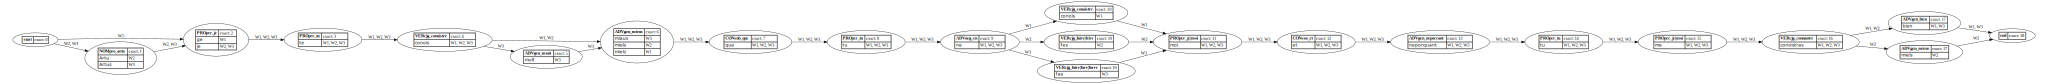

None
table created!


In [1]:
from collatex import *
collation = Collation()
import csv, re
from general_functions import tag_poslemma
from general_functions import table_automaticDictionary



tag_poslemma('example5')  # ex: create_poslemma('example1')
print("taggedAll and taggedDistinct created in folder Dictionaries/ !")


W1 = open( "data/example5/W1.txt", encoding='utf-8' ).read()
W2 = open( "data/example5/W2.txt", encoding='utf-8' ).read()
W3 = open( "data/example5/W3.txt", encoding='utf-8' ).read()

Normit = {}
with open('dictionaries/taggedDistinct_example5.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['Original', 'Normalised'])
    for row in reader:
        Normit[row['Original']]= row['Normalised']

#read in the witnesses  from your file system 
from collatex.core_classes import WordPunctuationTokenizer
tokenizer = WordPunctuationTokenizer()

# build a function to tokenize and to normalize by replace keys to be 
# found in the dictionary by the corresponding values 
def tokennormalizer(witness) :
    tokens_as_strings = tokenizer.tokenize(witness)
    list = []
    for token_string in tokens_as_strings:
        normversion = re.sub(r'\s+$',"", token_string)
        replaceversion = Normit.get(normversion,normversion)
        list.append({'t':token_string, 'n':replaceversion})
    return(list)

#collate
tokens_W1 = tokennormalizer(W1) 
tokens_W2 = tokennormalizer(W2) 
tokens_W3 = tokennormalizer(W3) 

witness_W1 = { "id": "W1", "tokens":tokens_W1 }
witness_W2 = { "id": "W2", "tokens":tokens_W2 }
witness_W3 = { "id": "W3", "tokens":tokens_W3 }


input = { "witnesses": [ witness_W1, witness_W2, witness_W3 ] }

table = collate(input, output='html2', segmentation=False)
print(table)
graphSvg = collate(input, output='svg', segmentation=False)
print(graphSvg)

graph_automaticDictionary = collate(input, output='json', segmentation=False)
table_automaticDictionary(graph_automaticDictionary, 'example5')
print('table created!')